<a href="https://colab.research.google.com/github/gustavor10silva/alura_imersao_dados_4/blob/main/1_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Importando bibliotecas

In [48]:
import pandas as pd

!pip install pandasql
import pandasql as ps
from pandasql import sqldf

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib.pyplot import figure

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2 Análise exploratória geral

A análise exploratória tem como objetivo explorar o conjunto de dados, obter informações sobre as variáveis e sobre a qualidade dos dados.

Uma etapa de análise exploratória permite identificar:

* Tratamentos de dados a serem feitos (tipagem, limpeza etc)
* Colunas que possuem dados faltantes
* Outliers que precisam ser tratados ou removidos
* Filtros na base de dados a serem feitos (por exemplo, manter somente o município de SP, que é o foco)

E, identificando esses pontos na análise exploratória, podemos prosseguir executando os tratamentos necessários na base.

In [3]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df_bruto = pd.read_csv(url)
#df_bruto["Valor"] = df_bruto["Valor"].replace('[^0-9]', '', regex=True).astype(int)
df_bruto.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
# seleciona dados aleatoriamente
df_bruto.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2350,NaN,Consolação,São Paulo,340,9,5,5,R$ 21.000\n /Mês
6232,NaN,Jardim Guedala,São Paulo,577,4,6,7,R$ 15.000\n /Mês
7702,Rua Marituba,Chácara Monte Alegre,São Paulo,390,4,3,4,R$ 2.250.000
6480,"Rua Dom Macário, 175",Vila da Saúde,São Paulo,312,3,4,6,R$ 1.400.000
4474,Rua Maracaí,Aclimação,São Paulo,140,3,4,1,R$ 910.000
3794,NaN,Vila Inglesa,São Paulo,175,3,1,2,R$ 485.000
2194,NaN,Cidade São Mateus,São Paulo,61,1,1,1,R$ 147.288
8591,NaN,Sumaré,São Paulo,355,3,2,2,R$ 10.000\n /Mês
8309,Rua Heitor Peixoto,Cambuci,São Paulo,125,2,3,2,R$ 1.050.000
3683,Avenida Morumbi,Morumbi,São Paulo,285,4,3,3,R$ 3.150.000


In [5]:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [6]:
df_bruto.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [7]:
# tirando a média de uma única coluna
df_bruto.Metragem.mean()

442.30065947242207

In [8]:
lista_vila_mariana = (df_bruto["Bairro"] == "Vila Mariana")
lista_vila_mariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [9]:
# note que temos 184 imoveis no bairro Vila Mariana
sum(lista_vila_mariana)

184

In [10]:
imoveis_vila_mariana = df_bruto[lista_vila_mariana]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [11]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

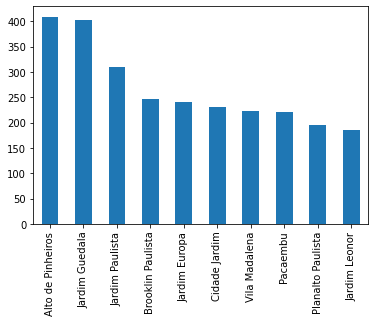

In [12]:
qtd_imoveis_bairro = df_bruto["Bairro"].value_counts()
qtd_imoveis_bairro.head(10).plot.bar()

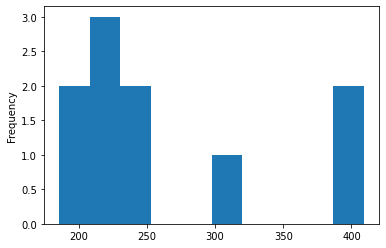

In [13]:
qtd_imoveis_bairro.head(10).plot.hist()

# 3 Análise de pontos específicos

Roteiro:

1. Descobrir quais são os principais bairros da base de dados
2. Realizar a média da metragem para cada um dos bairros
3. 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas)
4. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
5. Pegar outras estatísticas dos dados: média, mediana, min, máx
6. Descobrir quais são os bairros que não tem nome de Rua

## 3.1 Principais bairros da base

Primeiro, vejamos quantos são os bairros da base de dados:

In [14]:
qtd_imoveis_bairro = df_bruto["Bairro"].value_counts()
qtd_imoveis_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

De início, já vemos que existe uma diferente incidência de bairros na base de dados, onde:

* Uma parcela pequena de bairros concentra uma grande quantidade de imóveis da base;
* Vários bairros possuem apenas um imóvel da base

Esse cenário pede um gráfico de pareto, para podermos analisar essa discrepância:

In [20]:
query = """SELECT
               Bairro,
               COUNT(Cidade) as quantidade
           FROM df_bruto
           GROUP BY Bairro
           ORDER BY quantidade DESC"""
consulta = sqldf(query)
df_pareto = consulta
df_pareto.head()

,Bairro,quantidade
0,Alto de Pinheiros,409
1,Jardim Guedala,403
2,Jardim Paulista,309
3,Brooklin Paulista,247
4,Jardim Europa,240


In [21]:
df_pareto["cumpercentage"] = df_pareto["quantidade"].cumsum()/df_pareto["quantidade"].sum()*100
df_pareto

,Bairro,quantidade,cumpercentage
0,Alto de Pinheiros,409,4.086731
1,Jardim Guedala,403,8.113509
2,Jardim Paulista,309,11.201039
3,Brooklin Paulista,247,13.669065
4,Jardim Europa,240,16.067146
...,...,...,...
697,Vila Santo Estevão,1,99.960032
698,Vila São José,1,99.970024
699,Vila Vasconcelos,1,99.980016
700,Vila Virginia,1,99.990008


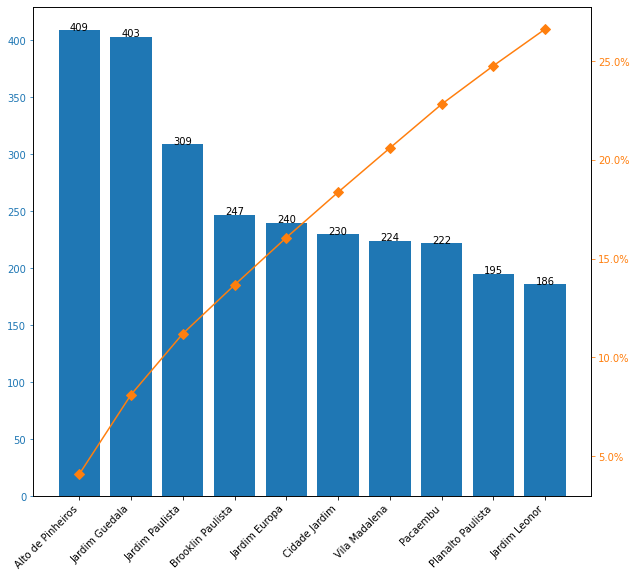

In [26]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.annotate(y_list[i-1],(i-1,y_list[i-1]),ha="center")

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(df_pareto["Bairro"].head(10), df_pareto["quantidade"].head(10), color="C0")
add_value_label(df_pareto["Bairro"].head(10), df_pareto["quantidade"].head(10))
ax2 = ax.twinx()
ax2.plot(df_pareto["Bairro"].head(10), df_pareto["cumpercentage"].head(10), color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

fig.autofmt_xdate(rotation=45)

plt.show()

## 3.2 Metragem por bairro

Com a consulta em SQL abaixo, temos a média de metragem dos imóveis por bairro:

In [27]:
query = """SELECT
               Bairro,
               AVG(Metragem) as avg_metragem
           FROM df_bruto
           GROUP BY Bairro
           ORDER BY avg_metragem DESC"""
consulta = sqldf(query)
consulta

,Bairro,avg_metragem
0,Sítio Represa,37000.000000
1,Vila Castelo,2850.000000
2,Jardim Guedala,2486.640199
3,Jardim das Camélias,1700.000000
4,Chácara Flora,1260.727273
...,...,...
697,Cidade Antônio Estevão de Carvalho,57.500000
698,Jardim Nova Germania,57.000000
699,Jardim Benfica,48.000000
700,Vila Leonor,46.000000


## 3.3 Formas de filtrar por bairro

Forma 1: passando uma lista com True e False no lugar do index

In [28]:
lista_vila_mariana = (df_bruto["Bairro"] == "Vila Mariana")
lista_vila_mariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [29]:
df_bruto[lista_vila_mariana].head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


Forma 2: usando o pd.DataFrame.query

In [30]:
df_bruto.query('Bairro=="Vila Mariana"').head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


Forma 3: usando o .eq()

In [31]:
df_bruto[df_bruto["Bairro"].eq("Vila Mariana")].head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


## 3.4 Plotar gráficos e tirar conclusões

Para que a coluna "Valor" apareça nos gráficos abaixo, precisamos que ela seja uma coluna numérica.

No momento, o formato dessa coluna é string e os valores estão no formato 'R$ 123.456.789'.

Então vamos fazer a conversão desses dados para int:

In [34]:
# precisamos manter só os números e transformar em int 
df_bruto["Valor"] = df_bruto["Valor"].replace('[^0-9]', '', regex=True).astype(int)
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.6+ KB


Agora a coluna valor está no formato int64 e podemos prosseguir.

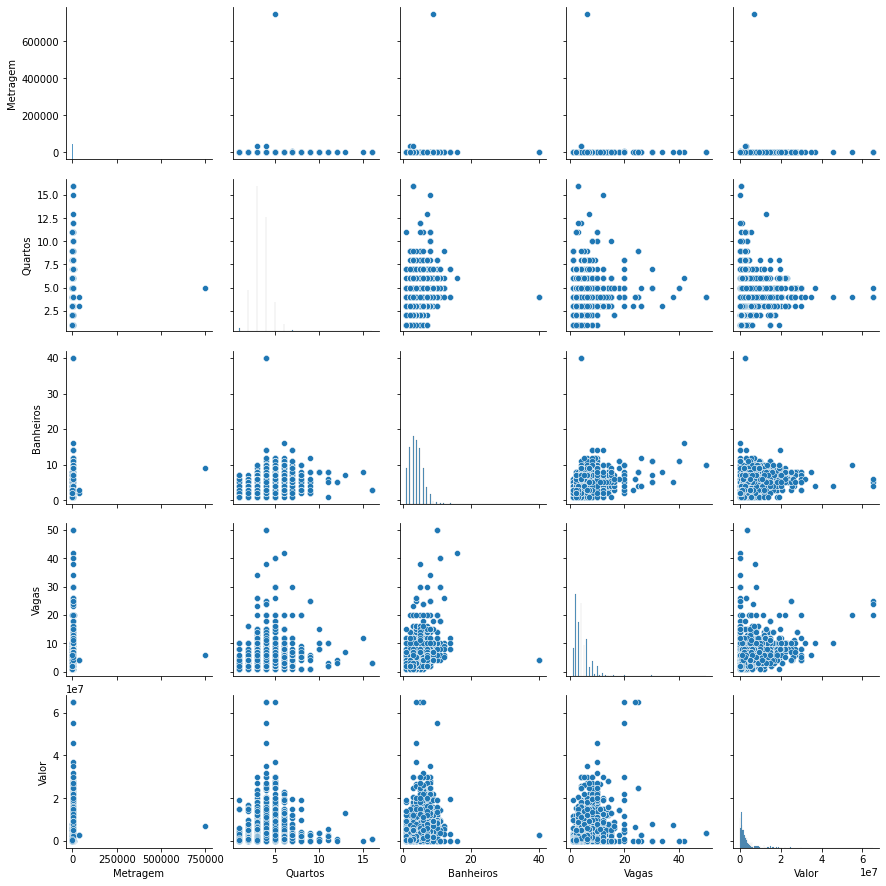

In [35]:
sns.pairplot(df_bruto)

Note que, de início, não são evidentes as correlações entre as variáveis.

Isso está ocorrendo porque a visualização está sendo prejudicada pelos outliers.

Por exemplo, no gráfico de Valor x Metragem:

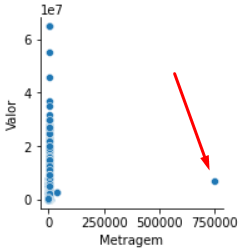

Vamos identificar esse outlier:

In [36]:
query = """SELECT *
           FROM df_bruto
           ORDER BY Metragem DESC
           """
consulta_outlier_metragem = sqldf(query)
consulta_outlier_metragem.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,7000000
1,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,2900000
2,None,Jardim da Glória,São Paulo,35677,3,3,4,2550000
3,"Rua Duque de Caxias, 298",Santo Amaro,São Paulo,7126,7,2,20,80000
4,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,4000000


In [37]:
consulta_outlier_metragem.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+06
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+06
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


Note que o outlier é um imóvel no Jardim Guedala que possui uma metragem de $750000 m^2$, contra a média que é $442 m^2$. Vamos plotar o pairplot novamente sem esse dado:

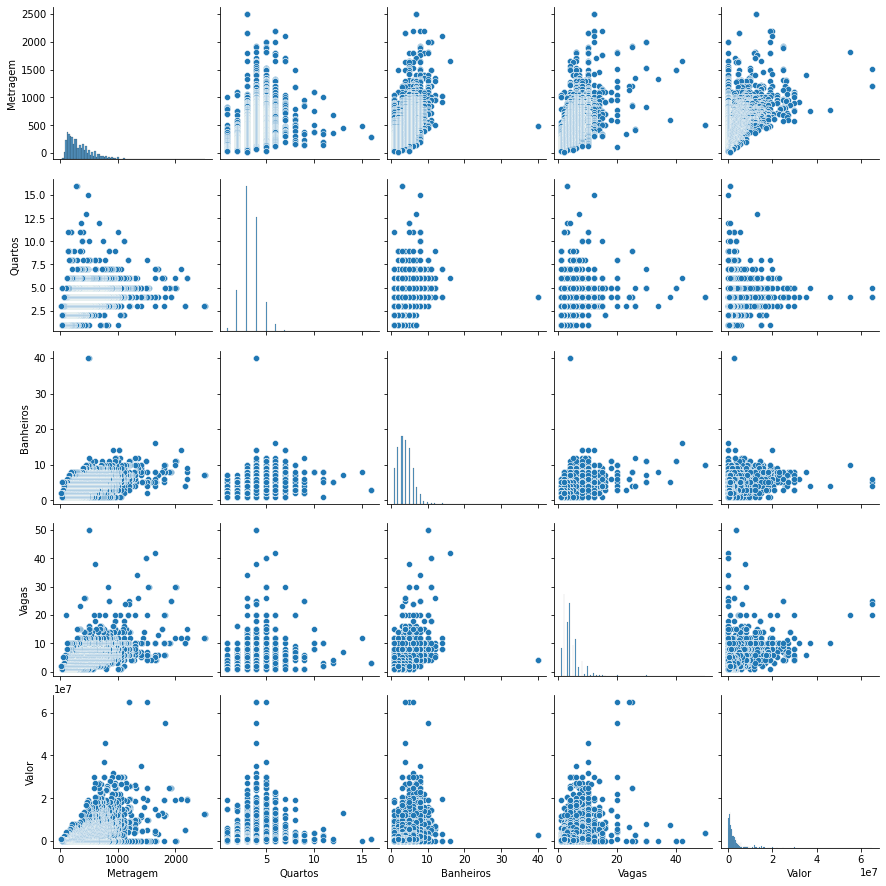

In [38]:
# com o comando .iloc[5:] pegamos todas as linhas do dataframe a partir da linha 5, então excluímos os maiores outliers
sns.pairplot(consulta_outlier_metragem.iloc[5:])

Note que, retirando esses outliers, os gráfico já se tornaram mais amigáveis e já conseguimos até identificar algumas correlações entre as variáveis, por exemplo:

* Quanto maior a metragem, maior o valor.

Porém, ainda temos outliers que prejudicam a visualização, por isso é importante a etapa de identificação e tratamento de outliers, que virá depois.

## 3.5 Descobrir os bairros sem rua

Primeiro, vamos ver a quantidade de ruas faltantes por bairro:

In [39]:
query = """SELECT
           Bairro,
           COUNT(Cidade) as rua_missing
           FROM df_bruto
           WHERE (Rua IS NULL)
           GROUP BY Bairro
           ORDER BY rua_missing DESC
           """
consulta_rua_faltante = sqldf(query)
consulta_rua_faltante

,Bairro,rua_missing
0,Jardim Guedala,190
1,Alto de Pinheiros,169
2,Jardim Paulista,138
3,Jardim Europa,128
4,Jardim Leonor,118
...,...,...
389,Vila Tiradentes,1
390,Vila Vasconcelos,1
391,Vila Virginia,1
392,Vila das Belezas,1


Agora, veremos a quantidade de imóveis por bairro, na nossa base de dados:

In [41]:
query = """SELECT
           Bairro,
           COUNT(Cidade) as qtd_imoveis
           FROM df_bruto
           GROUP BY Bairro
           """
qtd_imoveis_bairro = sqldf(query)
qtd_imoveis_bairro

,Bairro,qtd_imoveis
0,None,12
1,Aclimação,88
2,Alto da Boa Vista,8
3,Alto da Lapa,86
4,Alto da Mooca,20
...,...,...
697,Vila Água Funda,5
698,Água Branca,13
699,Água Fria,12
700,Água Funda,2


Agora, vamos cruzar essas informações, para termos a quantidade de imóveis e de ruas faltantes por bairro:

In [43]:
query = """SELECT qtd_imoveis_bairro.Bairro,
                  qtd_imoveis_bairro.qtd_imoveis,
                  consulta_rua_faltante.rua_missing,
                  consulta_rua_faltante.rua_missing / CAST(qtd_imoveis_bairro.qtd_imoveis AS FLOAT64) AS porc_missing_rua
           FROM qtd_imoveis_bairro
           INNER JOIN
           consulta_rua_faltante
           ON qtd_imoveis_bairro.Bairro = consulta_rua_faltante.Bairro
           ORDER BY rua_missing DESC
           """
missing_ruas_analise = sqldf(query)
missing_ruas_analise

,Bairro,qtd_imoveis,rua_missing,porc_missing_rua
0,Jardim Guedala,403,190,0.471464
1,Alto de Pinheiros,409,169,0.413203
2,Jardim Paulista,309,138,0.446602
3,Jardim Europa,240,128,0.533333
4,Jardim Leonor,186,118,0.634409
...,...,...,...,...
389,Vila Tiradentes,7,1,0.142857
390,Vila Vasconcelos,1,1,1.000000
391,Vila Virginia,1,1,1.000000
392,Vila das Belezas,2,1,0.500000


Note que os dados indicam que as duas variáveis estão correlacionadas. Ou seja, quanto maior a quantidade de imóveis de um determinado imóvel na base, maior é o número de ruas com dados faltantes.

Vejamos um gráfico:

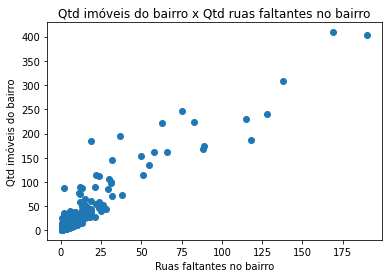

In [44]:
plt.scatter(missing_ruas_analise["rua_missing"], missing_ruas_analise["qtd_imoveis"])
plt.xlabel("Ruas faltantes no bairro")
plt.ylabel("Qtd imóveis do bairro")
plt.title("Qtd imóveis do bairro x Qtd ruas faltantes no bairro")
plt.show()

Esse gráfico nos mostra que, realmente, existe a correlação entre essas duas variáveis.

Na prática, isso significa que não temos um conjunto específico de bairros que foi afetado na base de dados com a falta das ruas, mas que esse é um problema presente em todo o dataset, que se torna mais evidente à medida que temos mais imóveis por dado.

Por último, ainda podemos tomar o percentual de dados faltantes por bairro, para evidenciar que isso não é um problema de um bairro específico:

In [45]:
query = """SELECT *
           FROM missing_ruas_analise
           WHERE qtd_imoveis > 5
           ORDER BY porc_missing_rua DESC
           """
missing_ruas_analise_final = sqldf(query)
missing_ruas_analise_final

,Bairro,qtd_imoveis,rua_missing,porc_missing_rua
0,Vila Mafra,7,7,1.000000
1,Jardim Londrina,11,10,0.909091
2,Jardim Taboão,7,6,0.857143
3,Jardim Santo Amaro,12,10,0.833333
4,Jardim Monte Kemel,16,13,0.812500
...,...,...,...,...
214,Vila Pompéia,28,2,0.071429
215,Jardim Brasil (Zona Sul),16,1,0.062500
216,Brooklin,36,2,0.055556
217,Jardim Aeroporto,26,1,0.038462


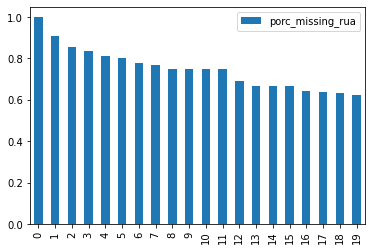

In [46]:
missing_ruas_analise_final[['Bairro', 'porc_missing_rua']].head(20).plot.bar()

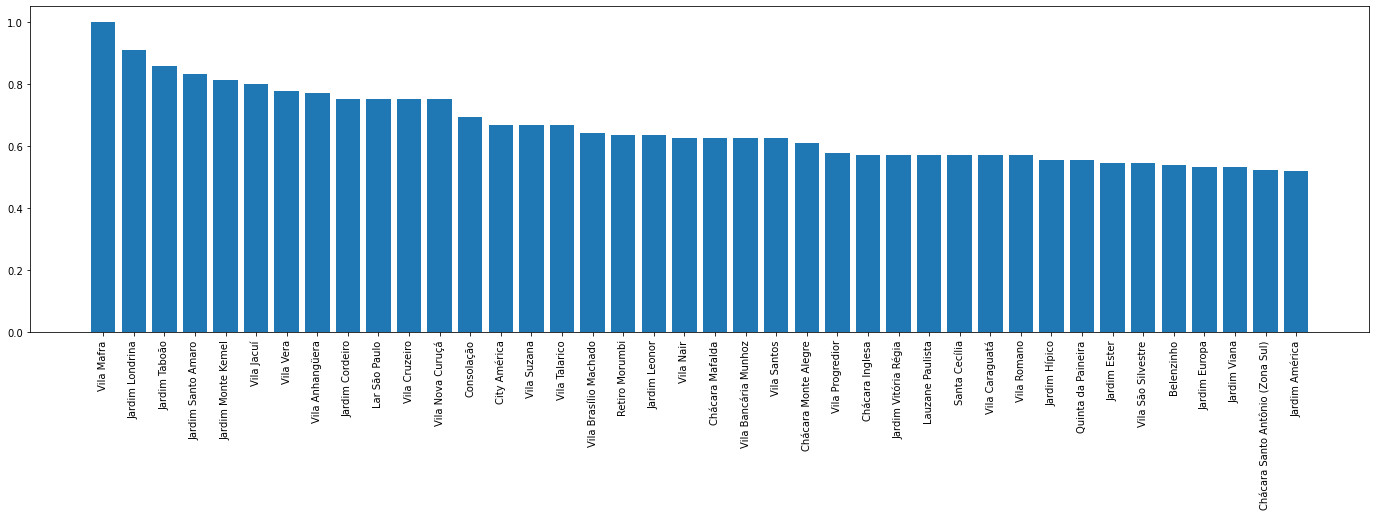

In [47]:
figure(figsize=(24, 6))

plt.bar(missing_ruas_analise_final["Bairro"].head(40), missing_ruas_analise_final["porc_missing_rua"].head(40))
plt.xticks(rotation = 90)
plt.show()

In [49]:
missing_ruas_analise_final.describe()

,qtd_imoveis,rua_missing,porc_missing_rua
count,219.000000,219.000000,219.000000
mean,39.958904,14.301370,0.359758
std,62.608388,26.686776,0.189070
min,6.000000,1.000000,0.022727
25%,9.000000,3.000000,0.215839
50%,16.000000,5.000000,0.333333
75%,39.000000,13.000000,0.481685
max,409.000000,190.000000,1.000000


Na média, os bairros possuem 35% dos imóveis sem a informação da rua.